In [1]:
#!pip install imbalanced-learn

In [2]:
#loading basic dependencies
import numpy as np
import pandas as pd 
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns

data=pd.read_csv("employee_promotion.csv")
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
data.describe()
#data.describe(include="object")

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Class 0: 50140
Class 1: 4668
Proportion: 10.74 : 1


C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


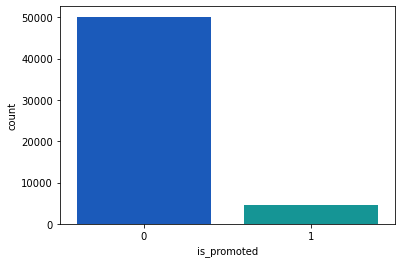

In [4]:
#Getting class distrubtion 
target_class=data.is_promoted.value_counts()
print('Class 0:', target_class[0])
print('Class 1:', target_class[1])
print('Proportion:', round(target_class[0] / target_class[1], 2), ': 1')

sns.countplot('is_promoted', data=data, palette='winter');

In [5]:
#checking null values
data.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [6]:
#imputing the null values
data['education'].fillna("No Education", inplace = True)
data['previous_year_rating'].fillna(data['previous_year_rating'].mean(), inplace=True)

In [7]:
#checking for null values after imputation
data.isnull().any().any()

False

In [8]:
#Using label encoder for converting categorical values to numerical values
lb=LabelEncoder()
data['department']= lb.fit_transform(data['department'])
data['region']= lb.fit_transform(data['region'])
data['education']= lb.fit_transform(data['education'])
data['gender']= lb.fit_transform(data['gender'])
data['recruitment_channel']= lb.fit_transform(data['recruitment_channel'])

In [9]:
#loading into X and y
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [10]:
#Splitting dataset 
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=0)

Using Random forest for classification without any sampling method on this imbalanced data

In [11]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_predict=clf.predict(X_test)

[[12514    34]
 [  848   306]]


<AxesSubplot:>

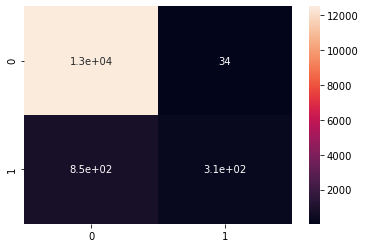

In [12]:
#Confusion metrics
cm=confusion_matrix(y_test,y_predict)
print(cm)
sns.heatmap(cm, annot=True)

In [13]:
#Accuracy and classification report
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.9356298350605751
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12548
           1       0.90      0.27      0.41      1154

    accuracy                           0.94     13702
   macro avg       0.92      0.63      0.69     13702
weighted avg       0.93      0.94      0.92     13702



Using OverSampling method to balance the dataset

In [14]:
#OverSampling
ros = RandomOverSampler(random_state=0)
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_sample(X, y)

AttributeError: 'RandomOverSampler' object has no attribute 'fit_sample'

In [ ]:
#checking for class distribution after oversampling
target_class_resampled=np.unique(y_resampled , return_counts=True)
print('Class 0:', target_class_resampled[1][0])
print('Class 1:', target_class_resampled[1][1])
print('Proportion:', round(target_class_resampled[1][0] / target_class_resampled[1][1], 2), ': 1')

sns.countplot(y_resampled, palette='winter');

In [ ]:
#Splitting the dataset
X_train_re, X_test_re,y_train_re,y_test_re=train_test_split(X_resampled,y_resampled, test_size=0.25, random_state=0)

In [ ]:
#Using random forest on this resampled dataset
clf=RandomForestClassifier()
clf.fit(X_train_re,y_train_re)
y_predict_re=clf.predict(X_test_re)

In [ ]:
#confusion metrics
cm=confusion_matrix(y_test_re,y_predict_re)
print(cm)
sns.heatmap(cm, annot=True)

In [ ]:
#Accuracy score and classification report
print(accuracy_score(y_test_re,y_predict_re))
print(classification_report(y_test_re,y_predict_re))